# Imports

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/spectral_clustering-01.csv')
df

,Feature_1,Feature_2,True_Label
0,-7.459200,6.479711,3
1,-8.228071,-6.907257,2
2,10.114386,-0.047576,1
3,-2.901306,7.550771,0
4,-6.279020,-7.084147,2
...,...,...,...
495,-7.159101,8.433083,3
496,-2.586299,9.355438,0
497,-7.047520,-6.045599,2
498,-7.140989,-6.355605,2


In [48]:
# Separate features and true labels (labels are used for evaluation only)
X = df[["Feature_1", "Feature_2"]].values
true_labels = df["True_Label"].values
X

array([[-7.45919977e+00,  6.47971121e+00],
       [-8.22807051e+00, -6.90725703e+00],
       [ 1.01143862e+01, -4.75760294e-02],
       [-2.90130578e+00,  7.55077118e+00],
       [-6.27902023e+00, -7.08414728e+00],
       [-6.46445928e+00, -7.30815151e+00],
       [-5.76622631e+00,  7.20825104e+00],
       [-6.74439878e+00, -6.90522865e+00],
       [ 1.97082776e+00,  1.61722097e+00],
       [-7.19203648e+00, -6.86706407e+00],
       [ 3.02344663e+00, -7.30700325e-01],
       [-1.35060204e+00,  8.19360381e+00],
       [ 9.97246227e+00, -2.90704981e+00],
       [-1.93830711e+00,  1.01498518e+01],
       [-6.73473976e+00, -5.84240919e+00],
       [ 7.28594005e+00, -2.42367903e+00],
       [-2.58120774e+00,  1.00178190e+01],
       [-1.01855942e+01,  7.78241461e+00],
       [-8.73958697e+00,  8.60209937e+00],
       [-3.61553260e+00,  7.81807950e+00],
       [ 1.14345990e+00,  3.38059278e+00],
       [-2.30033403e+00,  7.05461600e+00],
       [ 6.08127124e+00,  2.75129507e+00],
       [-6.

In [49]:
# Standardizing the features is often useful in clustering

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[-7.59335544e-01,  5.61278990e-01],
       [-9.00966001e-01, -1.52778453e+00],
       [ 2.47782105e+00, -4.57317407e-01],
       [ 8.02550007e-02,  7.28420070e-01],
       [-5.41939619e-01, -1.55538861e+00],
       [-5.76098570e-01, -1.59034492e+00],
       [-4.47480001e-01,  6.74969107e-01],
       [-6.27665050e-01, -1.52746799e+00],
       [ 9.77730295e-01, -1.97522462e-01],
       [-7.10122515e-01, -1.52151233e+00],
       [ 1.17162880e+00, -5.63920338e-01],
       [ 3.65903635e-01,  8.28735404e-01],
       [ 2.45167784e+00, -9.03544085e-01],
       [ 2.57644948e-01,  1.13401186e+00],
       [-6.25885804e-01, -1.36161286e+00],
       [ 1.95680485e+00, -8.28113095e-01],
       [ 1.39218917e-01,  1.11340788e+00],
       [-1.26155323e+00,  7.64568496e-01],
       [-9.95190303e-01,  8.92481963e-01],
       [-5.13097278e-02,  7.70134075e-01],
       [ 8.25324330e-01,  7.76552805e-02],
       [ 1.90957487e-01,  6.50994049e-01],
       [ 1.73489786e+00, -2.05479015e-02],
       [-6.

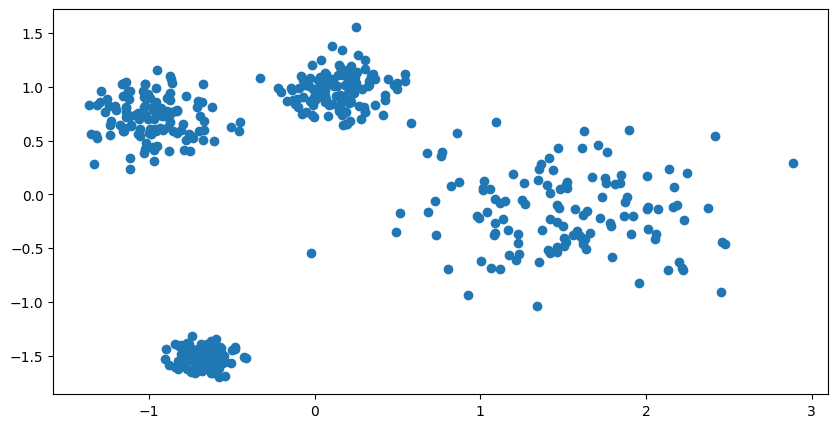

In [50]:
# Visualization

plt.figure(figsize = (10,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1])

plt.show()

In [51]:
# Apply Spectral Clustering
# n_clusters = 4
# affinity ='nearest_neighbors' builds a similarity graph from k-nearest neighbors

spectral_model = SpectralClustering(n_clusters = 4,
                                    affinity='nearest_neighbors', # can be 'discretize'
                                    assign_labels='kmeans',
                                    random_state = 42,
                                    n_neighbors = 10 # baseline only
                                    )

In [52]:
# Fit and assign the cluster labels

predicted_labels = spectral_model.fit_predict(X_scaled)
predicted_labels

array([2, 0, 1, 3, 0, 0, 2, 0, 1, 0, 1, 3, 1, 3, 0, 1, 3, 2, 2, 3, 1, 3,
       1, 2, 2, 0, 0, 2, 2, 3, 0, 3, 3, 3, 0, 0, 1, 1, 2, 2, 0, 1, 3, 3,
       3, 1, 1, 1, 0, 2, 0, 3, 2, 0, 1, 3, 3, 2, 0, 2, 2, 3, 0, 2, 1, 0,
       0, 2, 1, 0, 1, 0, 0, 2, 3, 2, 3, 0, 1, 3, 0, 1, 0, 3, 2, 2, 2, 2,
       1, 3, 2, 0, 1, 0, 1, 2, 3, 1, 3, 2, 1, 1, 1, 2, 2, 3, 3, 2, 3, 2,
       0, 2, 2, 2, 2, 0, 1, 2, 0, 0, 3, 1, 0, 1, 2, 1, 1, 0, 0, 2, 2, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 0, 2, 2, 3, 3, 3, 0, 0, 1, 1,
       3, 2, 3, 2, 0, 0, 2, 2, 1, 1, 0, 3, 1, 0, 2, 2, 0, 3, 3, 2, 2, 3,
       3, 0, 0, 0, 3, 2, 3, 3, 2, 2, 3, 1, 3, 0, 0, 2, 2, 0, 3, 0, 3, 3,
       2, 0, 3, 3, 0, 2, 1, 2, 0, 1, 1, 2, 2, 0, 2, 3, 3, 0, 3, 2, 3, 1,
       1, 3, 2, 3, 1, 3, 3, 0, 0, 1, 0, 1, 3, 0, 2, 0, 3, 0, 1, 1, 1, 0,
       3, 1, 2, 2, 1, 3, 3, 0, 3, 3, 3, 3, 1, 1, 2, 3, 0, 1, 3, 3, 2, 3,
       0, 0, 1, 3, 1, 0, 3, 3, 1, 2, 3, 3, 3, 1, 2, 0, 3, 1, 1, 3, 0, 3,
       1, 2, 1, 0, 0, 3, 3, 1, 2, 1, 2, 1, 0, 1, 0,

In [53]:
# Method 1: S-Scores
# Loop through different n_clusters and compute silhouette scores

from sklearn.metrics import silhouette_score

sil_scores = []
cluster_range = range(2, 10)

for n_clusters in cluster_range:

    model = SpectralClustering(
        n_clusters = n_clusters,
        affinity ='nearest_neighbors',
        assign_labels = 'kmeans',
        random_state = 42,
        n_neighbors = 10  # keep constant for now
    )
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

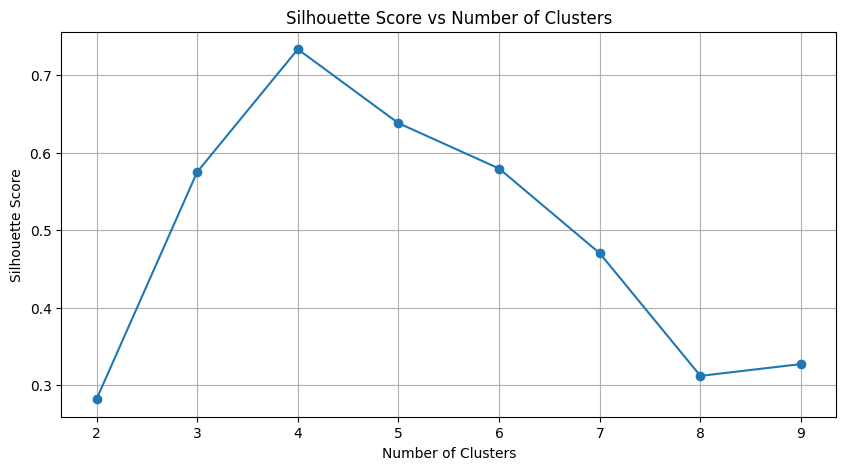

In [54]:
# Plot 1: Silhouette scores vs number of clusters

plt.figure(figsize = (10,5))
plt.plot(cluster_range, sil_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Peak at clusters → Strong candidates for the optimal number of clusters.

In [55]:
# Method 2: Eigen Gap Method

from sklearn.neighbors import kneighbors_graph
from sklearn.manifold import spectral_embedding

# Construct similarity graph using kneighbors

connectivity = kneighbors_graph(X_scaled, n_neighbors=10, include_self = True)
laplacian_embedding = spectral_embedding(connectivity, n_components=10, random_state=42)
eigenvalues = np.linalg.norm(laplacian_embedding, axis=0)  # approximate eigenvalues by their norms

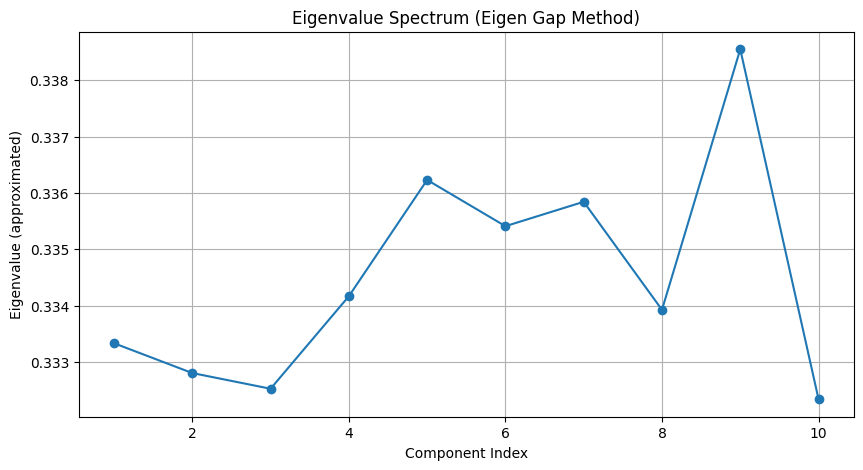

In [56]:
# Plot 2: Eigen Gaps

plt.figure(figsize = (10,5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title("Eigenvalue Spectrum (Eigen Gap Method)")
plt.xlabel("Component Index")
plt.ylabel("Eigenvalue (approximated)")
plt.grid(True)
plt.show()

# Look for a sudden jump ("gap") in the sorted eigenvalues.
# A sharp jump after the 4th eigenvalue suggests 4 clusters — confirming the silhouette analysis.

In [57]:
# Method for n_neighbors: Loop over different n_neighbors and compute silhouette scores

neighbors_range = range(5, 21)
neighbor_scores = []

for k in neighbors_range:

    model = SpectralClustering(
        n_clusters = 4, # identified clusters
        affinity='nearest_neighbors',
        assign_labels='kmeans',
        random_state=42,
        n_neighbors=k
    )

    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    neighbor_scores.append(score)

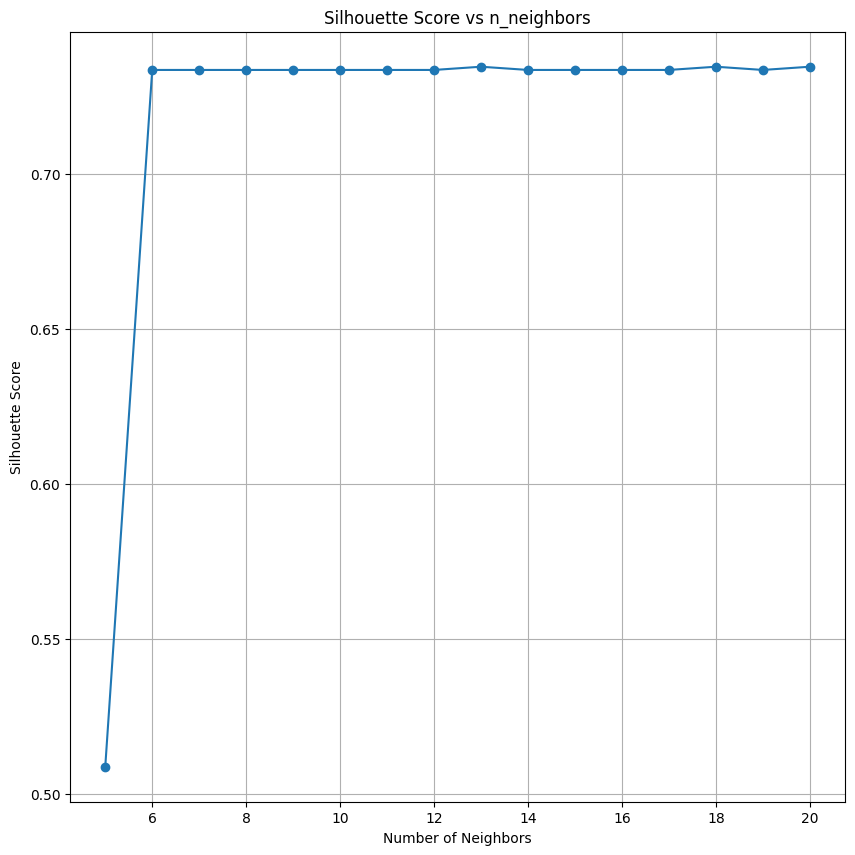

In [58]:
# Plot 3: Silhouette score vs n_neighbors

plt.figure(figsize = (10, 10))
plt.plot(neighbors_range, neighbor_scores, marker='o')
plt.title("Silhouette Score vs n_neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Silhouette Score")
plt.grid(True)

# Scores increase dramatically when n_neighbors ≥ 6.
# Optimal n_neighbors is around 12 to 14, where the silhouette score peaks.

In [85]:
# Remodel

spectral_model = SpectralClustering(n_clusters = 4,
                                    affinity='nearest_neighbors', # can be 'discretize'
                                    assign_labels='kmeans',
                                    random_state = 42,
                                    n_neighbors = 14 # baseline only
                                    )

In [86]:
# Re-Fit and assign the cluster labels

predicted_labels = spectral_model.fit_predict(X_scaled)
predicted_labels

array([2, 0, 1, 3, 0, 0, 2, 0, 1, 0, 1, 3, 1, 3, 0, 1, 3, 2, 2, 3, 1, 3,
       1, 2, 2, 0, 0, 2, 2, 3, 0, 3, 3, 3, 0, 0, 1, 1, 2, 2, 0, 1, 3, 3,
       3, 1, 1, 1, 0, 2, 0, 3, 2, 0, 1, 3, 3, 2, 0, 2, 2, 3, 0, 2, 1, 0,
       0, 2, 1, 0, 1, 0, 0, 2, 3, 2, 3, 0, 1, 3, 0, 1, 0, 3, 2, 2, 2, 2,
       1, 3, 2, 0, 1, 0, 1, 2, 3, 1, 3, 2, 1, 1, 1, 2, 2, 3, 3, 2, 3, 2,
       0, 2, 2, 2, 2, 0, 1, 2, 0, 0, 3, 1, 0, 1, 2, 1, 1, 0, 0, 2, 2, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 0, 2, 2, 3, 3, 3, 0, 0, 1, 1,
       3, 2, 3, 2, 0, 0, 2, 2, 1, 1, 0, 3, 1, 0, 2, 2, 0, 3, 3, 2, 2, 3,
       3, 0, 0, 0, 3, 2, 3, 3, 2, 2, 3, 1, 3, 0, 0, 2, 2, 0, 3, 0, 3, 3,
       2, 0, 3, 3, 0, 2, 1, 2, 0, 1, 1, 2, 2, 0, 2, 3, 3, 0, 3, 2, 3, 1,
       1, 3, 2, 3, 1, 3, 3, 0, 0, 1, 0, 1, 3, 0, 2, 0, 3, 0, 1, 1, 1, 0,
       3, 1, 2, 2, 1, 3, 3, 0, 3, 3, 3, 3, 1, 1, 2, 3, 0, 1, 3, 3, 2, 3,
       0, 0, 1, 3, 1, 0, 3, 3, 1, 2, 3, 3, 3, 1, 2, 0, 3, 1, 1, 3, 0, 3,
       1, 2, 1, 0, 0, 3, 3, 1, 2, 1, 2, 1, 0, 1, 0,

In [87]:
# Optional

# Using Adjusted Rand Index to compare clustering with ground truth
ari_score = adjusted_rand_score(true_labels, predicted_labels)
print(f"Adjusted Rand Index: {ari_score:.3f}")

Adjusted Rand Index: 1.000


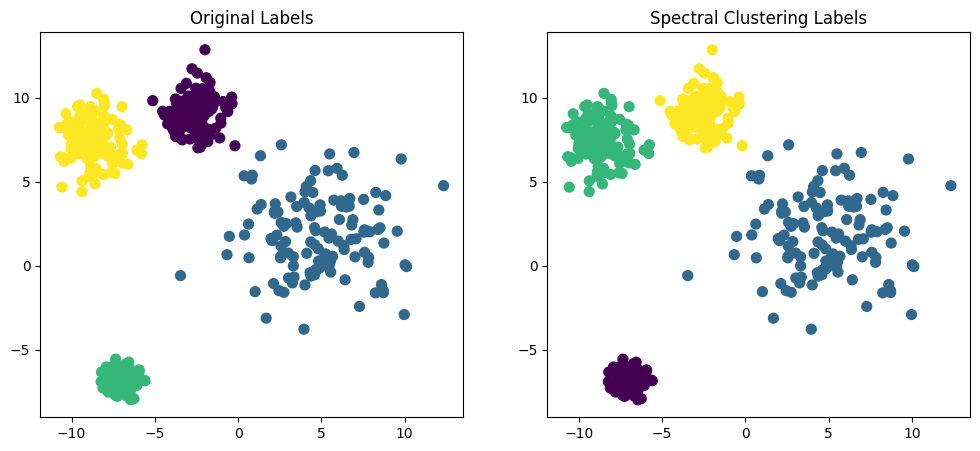

In [88]:
# Visualize the Results

# Plotting the original and clustered data side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original labels
axes[0].scatter(X[:, 0], X[:, 1], c = true_labels, s = 50)
axes[0].set_title("Original Labels")

# Predicted cluster labels
axes[1].scatter(X[:, 0], X[:, 1], c = predicted_labels, s = 50)
axes[1].set_title("Spectral Clustering Labels")

plt.show()